<a href="https://colab.research.google.com/github/Dikiwp30/Studi-Independen/blob/main/Diki_Wahyu_P_Warrior_of_Customer_Churn_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDI KASUS**

Terdapat dataset konsumen dengan **2 kategori churn**, yaitu **pelanggan aktif (0) dan pelanggan yang sudah berhenti (1)**



---



**KLASIFIKASI KONSUMEN**

**Memanggil Library**

In [25]:
# import libraries
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

**Load Dataset**

sumber dataset : http://buku.dioskurn.com/buku1/ch9

In [26]:
df = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [27]:
# Pada product, nilai atribut Kartu A didefinisikan sebagai 0, Kartu B didefinisikan sebagai 1, dan Kartu C didefinisikan sebagai 2
df['product'] = df['product'].map({'Kartu A': 0,'Kartu B': 1, 'Kartu C':2})
df['product'].value_counts()
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,1,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,1,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,1,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


**Feature set**

Selanjutnya, kita format dataset, yaitu bentuk feature sets (kumpulan atribut), kita bentuk variabel X dan Y
Untuk menggunakan library scikit-learn library, kita harus convert format data frame-nya Panda, ke array Numpy :

In [28]:
df.keys()

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [29]:
# atribut predictor
X = df[['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure']]

In [30]:
# atribut target
Y = df['churn'].values

**Normalisasi Data**

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [40]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))

**Pembagian Data Training dan Testing**

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing. Kali ini kita membagi dataset dengan komposisi **sebesar 80% data training dan 20% data testing.**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8000, 13) (8000,)
Test set: (2000, 13) (2000,)


**Klasifikasi K-nearest neighbor (K-NN)**

**Training**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=7:

In [43]:
k = 7
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=7)

**Predicting**

Kita sudah dapat menggunakan **model** yang terbentuk **untuk memprediksikan data**

In [44]:
yhat = knn.predict(X_test)
print(yhat)

[0 1 0 ... 1 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, **nilai akurasi klasifikasi** secara sederhana dapat dihitung dengan memperbandingkan kelas **hasil prediksi algoritma** dengan kelas sebenarnya / actual class.

In [45]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.93475
Test set Accuracy:  0.918


**MENCARI NILAI TERBAIK**

Performa dari model** K-NN sangat bergantung dengan nilai K**. Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1 s.d k=10.**

In [46]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.914 , 0.922 , 0.926 , 0.9265, 0.9215, 0.9215, 0.918 , 0.9185,
       0.914 ])

**Lalu kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan data maka dilakukan visualisasikan**

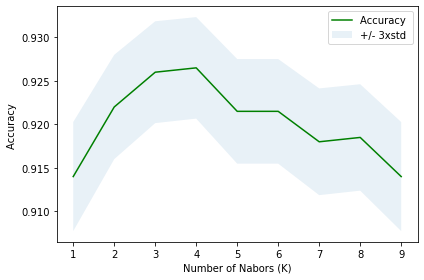

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9265 with k= 4


# Tugas
Lakukan pemodelan KNN dengan k terbaik yang sudah terpilih, lakukan prediksi dan hitung akurasinya

In [49]:
k = 4

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [50]:
yhat = knn.predict(X_test)
print(yhat)

[0 1 0 ... 1 0 0]


In [51]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.942375
Test set Accuracy:  0.9265


In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.914 , 0.922 , 0.926 , 0.9265, 0.9215, 0.9215, 0.918 , 0.9185,
       0.914 ])

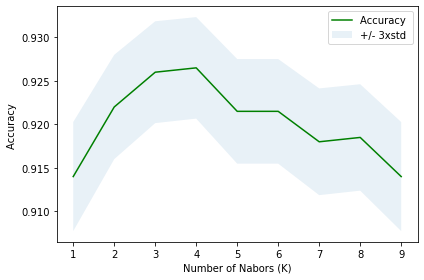

In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9265 with k= 4
